In [42]:
from torch3dseg.datasets.utils import get_train_loaders
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [11]:
file = '../configs/BIIAX/test.yml'

config = yaml.safe_load(open(file, 'r'))

In [12]:
config

{'model': {'name': 'UNet3D',
  'in_channels': 1,
  'out_channels': 3,
  'layer_order': 'gcr',
  'f_maps': 32,
  'num_groups': 8,
  'final_sigmoid': True,
  'is_segmentation': True},
 'loss': {'name': 'BCEDiceLoss',
  'ignore_index': None,
  'skip_last_target': False},
 'optimizer': {'learning_rate': 2e-05, 'weight_decay': 1e-05},
 'eval_metric': {'name': 'MeanIoU'},
 'lr_scheduler': {'name': 'ReduceLROnPlateau',
  'mode': 'max',
  'factor': 0.2,
  'patience': 10},
 'trainer': {'eval_score_higher_is_better': True,
  'checkpoint_dir': '/lustre/ssd/ws/dchristi-3dseg/checkpoints/BIIAX_model_00-lowres-2024-02-07',
  'resume': None,
  'pre_trained': None,
  'validate_after_iters': 200,
  'log_after_iters': 100,
  'max_num_epochs': 100,
  'max_num_iterations': 150000},
 'loaders': {'dataset': 'StandardHDF5Dataset',
  'num_workers': 8,
  'batch_size': 1,
  'raw_internal_path': '/raw',
  'label_internal_path': '/masks',
  'train': {'file_paths': ['/Volumes/LaCie/scratch/160_10-layer/labels/00/1

In [13]:
loaders = get_train_loaders(config)

2024-02-17 10:57:42,056 [MainThread] INFO Dataset - Creating training and validation set loaders...
2024-02-17 10:57:42,057 [MainThread] INFO HDF5Dataset - Loading train set from: /Volumes/LaCie/scratch/160_10-layer/labels/00/160_10-layer_0055_train.seg.h5...
2024-02-17 10:57:42,320 [MainThread] INFO Dataset - Slice builder config: {'name': 'FilterSliceBuilder', 'patch_shape': [64, 64, 64], 'stride_shape': [48, 48, 48], 'threshold': 0.01, 'slack_acceptance': 0.001}
2024-02-17 10:57:42,564 [MainThread] INFO HDF5Dataset - Number of patches: 275
1
2024-02-17 10:57:42,569 [MainThread] INFO HDF5Dataset - Loading val set from: /Volumes/LaCie/scratch/160_10-layer/labels/00/160_10-layer_0460-0690_0690-0920_val.seg.h5...
2024-02-17 10:57:42,818 [MainThread] INFO Dataset - Slice builder config: {'name': 'FilterSliceBuilder', 'patch_shape': [64, 64, 64], 'stride_shape': [48, 48, 48], 'threshold': 0.01, 'slack_acceptance': 0.001}
2024-02-17 10:57:43,066 [MainThread] INFO HDF5Dataset - Number of pa

In [55]:
t = next(iter(loaders["train"]))

In [59]:
input = t[0][0].cpu().numpy()
target = t[1][0].cpu().numpy()

In [67]:
print(input.shape)
print(target.shape)
print(np.max(target[2,:,slice,:]))

(1, 64, 64, 64)
(3, 64, 64, 64)
1.0


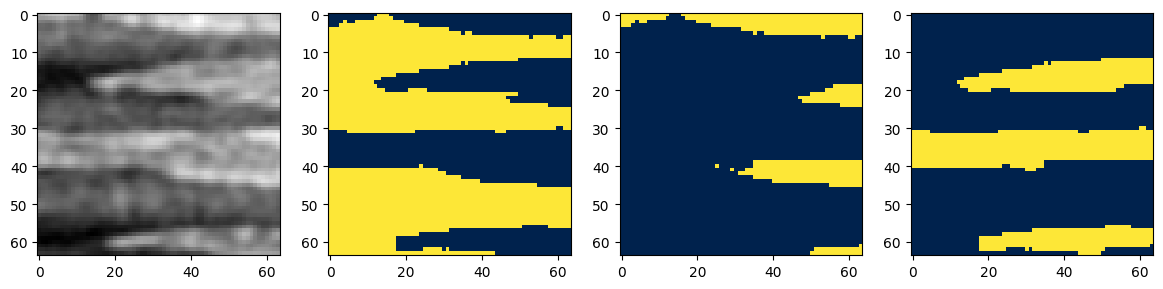

In [61]:
fig, axs = plt.subplots(1,4,figsize=(3.6*4,4.8))

axs = axs.flatten()

slice = 3

axs[0].imshow(input[0,:,slice,:],cmap="grey",)

axs[1].imshow(target[0,:,slice,:],cmap="cividis",vmin=0, vmax=1)
axs[2].imshow(target[1,:,slice,:],cmap="cividis",vmin=0, vmax=1)
axs[3].imshow(target[2,:,slice,:],cmap="cividis",vmin=0, vmax=1)
# axs[4].imshow(masks[2,:,slice,:],cmap="cividis")


In [58]:
from torch3dseg.augment.transforms import RandomFlip

In [76]:
randomstate = np.random.RandomState(47)

In [119]:
flip = RandomFlip(random_state=randomstate,axis_prob=.3, axes = (0,1,2))

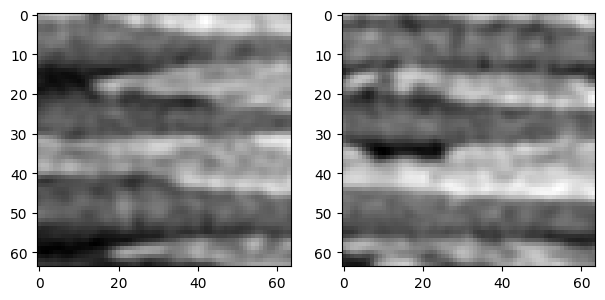

In [144]:
fig, axs = plt.subplots(1,2,figsize=(3.6*2,4.8))

axs = axs.flatten()
input_trans = flip(np.reshape(input, (64, 64, 64)))
slice = 3

axs[0].imshow(input[0,:,slice,:],cmap="grey",)
axs[1].imshow(input_trans[:,slice,:],cmap="grey",)